# **TWEETS CLASSIFICATION MODEL**
In this Problem Set, we have to build a Text Classifier which classifies the Twitter Messages regarding Covid Situation into 5 categories: Extremely Negative (0), Negative (1),
Neutral (2), Positive (3), Extremely Positive (4). 


In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**DATA EXPLORATION**

In [2]:
#Loading the Necessary Files
tweet_data=pd.read_csv('/Users/macbook/Desktop/USC-Syllabus/DS552/Problemset/Problemset5/ps5_tweets_text.csv')
label_data=pd.read_csv('/Users/macbook/Desktop/USC-Syllabus/DS552/Problemset/Problemset5/ps5_tweets_labels.csv')
nlabel_data=pd.read_csv('/Users/macbook/Desktop/USC-Syllabus/DS552/Problemset/Problemset5/ps5_tweets_labels_as_numbers.csv')
kaggle_data=pd.read_csv('/Users/macbook/Desktop/USC-Syllabus/DS552/Problemset/Problemset5/ps5_tweets_text_for_the_kaggle_competition.csv')

In [3]:
#Shape of the Tweet Dataset
print("Shape of the Tweet Dataset=",tweet_data.shape)
print("Shape of the Label Dataset=",label_data.shape)
print("Shape of the Numerical Label Dataset=",nlabel_data.shape)
print("Shape of the Kaggle Dataset=",kaggle_data.shape)

Shape of the Tweet Dataset= (37041, 2)
Shape of the Label Dataset= (37041, 2)
Shape of the Numerical Label Dataset= (37041, 2)
Shape of the Kaggle Dataset= (3798, 2)


In [4]:
#Twitter Data Display
tweet_data.head()

Id                                              Tweet
0   0  https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...
1   1  @mygovindia Today just after a week of lockdow...
2   2  Tuskys partners with Amref to provide on groun...
3   3  @chrissyteigen are u doing ur own grocery shop...
4   4  UK Critical Care Nurse Cries at Empty SuperMar...

In [5]:
#Twitter Data Labels Display
label_data.head()

Id           Sentiment
0   0  Extremely Positive
1   1            Negative
2   2             Neutral
3   3            Negative
4   4  Extremely Negative

In [6]:
#Numerical Twitter Data Labels Display
nlabel_data.head()

Id  Label
0   0      4
1   1      1
2   2      2
3   3      1
4   4      0

<AxesSubplot:>

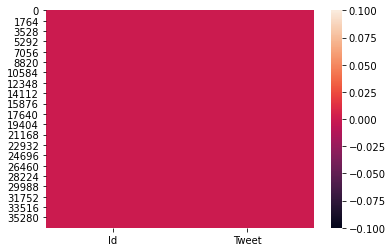

In [7]:
#Checking for Null Values one by one for all files
import seaborn as sns
sns.heatmap(tweet_data.isnull())

In [8]:
#Dropping the Duplicate Values if Any
tweet_data.drop_duplicates(inplace= True)
kaggle_data.drop_duplicates(inplace=True)

In [9]:
#Shape of File After Dropping Duplicates
print(" Shape of File after dropping duplicates: ",tweet_data.shape)

 Shape of File after dropping duplicates:  (37041, 2)


**EXPLORATORY DATA ANALYSIS**

In [10]:
#Merging 2 Labels files for EDA
EDA = pd.merge(label_data, nlabel_data, 
                   on='Id', 
                   how='left')

In [11]:
EDA

Id           Sentiment  Label
0          0  Extremely Positive      4
1          1            Negative      1
2          2             Neutral      2
3          3            Negative      1
4          4  Extremely Negative      0
...      ...                 ...    ...
37036  37036            Negative      1
37037  37037            Negative      1
37038  37038  Extremely Negative      0
37039  37039             Neutral      2
37040  37040  Extremely Negative      0

[37041 rows x 3 columns]

In [12]:
#Class Distribution
class_df = EDA.groupby('Sentiment').count()['Label'].reset_index().sort_values(by='Label',ascending=False)
class_df.style.background_gradient(cmap='PiYG')

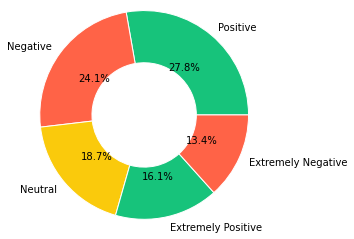

In [13]:
#Pie Chart
percent_class=class_df.Label
labels= class_df.Sentiment

colors = ['#17C37B','#FF6347','#FACA0C']
my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

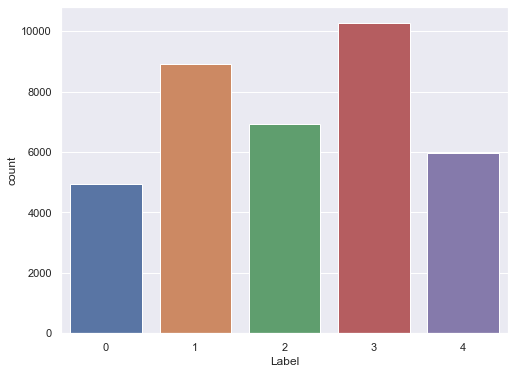

In [14]:
#Visualization of Sentiment Classes
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(nlabel_data['Label'])

# **DATA PREPROCESSING**
Performing Basic Cleaning of the Statement in the Tweets.

In [15]:
#Importing Necessary Libraries for Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


**STOPWORDS**

In [16]:
#Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#Load English Stop Words
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

Creating the Funtion to Clean the Twitter Message like Removing URL, Removing Mentions, Hashtags, Digits, HTML Tags and Removing the Connecting words included in 'English'Stop words.

In [18]:
#Tweet Clean Function
def tweet_clean(twee):
    #Remove URL
    twee = re.sub(r'https?://\S+|www\.\S+', " ", twee)

    #Remove Mentions
    twee = re.sub(r'@\w+',' ',twee)

    #Remove Punctuation
    twee= re.sub(r'[^\w\s\d]',' ',twee)

    #Remove Digits
    twee = re.sub(r'\d+', ' ', twee)

    #Remove HTML tags
    twee = re.sub('r<.*?>',' ', twee)

    #Remove Hastags
    twee = re.sub(r'#\w+', ' ', twee)

    #Remove Stop Words 
    twee = twee.split()
    #twee = " ".join(twee)
    
    twee = " ".join([word for word in twee if not word in stopword])

    return twee

In [19]:
#Applying Tweet Clean Function to Both Files
tweet_data['Tweet'] = tweet_data['Tweet'].astype(str).apply(lambda x: tweet_clean(x))
kaggle_data['Tweet'] = kaggle_data['Tweet'].astype(str).apply(lambda x: tweet_clean(x))

In [20]:
#Updated Sentiment Data
tweet_data["Tweet"]

0        Gaisss Please read please limit go outside ple...
1        Today week lockdown lot confectionary stores r...
2        Tuskys partners Amref provide ground health ed...
3        u ur grocery shopping like regular person u st...
4        UK Critical Care Nurse Cries Empty SuperMarket...
                               ...                        
37036    Minnesota classifies grocery store workers eme...
37037    US Senator asked information leveragedloans pr...
37038    Just commented Poll Are online shopping normal...
37039    My wife got laid yesterday small retail store ...
37040    Humanity doomed coronavirus coronacrisis toile...
Name: Tweet, Length: 37041, dtype: object

In [21]:
#Converting Tweets to String for Stemming and Word Net Lemmatizer 
tweets = tweet_data["Tweet"]
print(tweets)

0        Gaisss Please read please limit go outside ple...
1        Today week lockdown lot confectionary stores r...
2        Tuskys partners Amref provide ground health ed...
3        u ur grocery shopping like regular person u st...
4        UK Critical Care Nurse Cries Empty SuperMarket...
                               ...                        
37036    Minnesota classifies grocery store workers eme...
37037    US Senator asked information leveragedloans pr...
37038    Just commented Poll Are online shopping normal...
37039    My wife got laid yesterday small retail store ...
37040    Humanity doomed coronavirus coronacrisis toile...
Name: Tweet, Length: 37041, dtype: object


**PORTER STEMMER** 
The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. 


In [22]:
#Porter Stemmer
stemmer=nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tweets)

'gaisss please read please limit go outside please please always wash hands always use hand sanitizer and please get ready stock food today week lockdown lot confectionary stores running stock seen lockdown increased covid community spread specially b amp c class city emergency supply chain need pla tuskys partners amref provide ground health education awareness its supermarket branches kenya u ur grocery shopping like regular person u still outsourcing working poor risk getting coronavirus store u dont uk critical care nurse cries empty supermarket shelves panic buying coronavirus coronavirusuk covid makes heart ache elderly make disease either people want yo starve force every day expose bulk buy selfish b ds stopthepeak stayhom covid wrecks aluminium prices input costs china a aluminium ingot price declines rmb alumina price rmb covid aluminium prices china a aluminium ingot aluminaprice coronavirus alcircle new february home prices increased percent annual u s pre coronavirus world

In [23]:
tweets[4]

'UK Critical Care Nurse Cries Empty SuperMarket Shelves Panic Buying Coronavirus CoronavirusUK COVID'

**WORDNET LEMMATIZER** 
Lemmatize using WordNet's built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.

In [24]:
#Downloading Wordnet
#nltk.download('wordnet')

In [25]:
#Word Net Lemmatizer
#stemmer=nltk.stem.WordNetLemmatizer()
#" ".join(stemmer.lemmatize(token) for token in tweets)

In [26]:
#tweets[5]

**TOKEN INITIALIZATION**

In [27]:
#Splitting the Data set into Dependent and Independent Features
X=tweets
y=nlabel_data['Label']

In [28]:
#Initializing Tokens
tokenizer = Tokenizer()

#Text to Matrix
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_matrix(X, mode='tfidf')
print("Shape of Data:",X.shape)

Shape of Data: (37041, 40786)


In [29]:
#Array of Tweet Data
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.10456894, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.10456894, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.10456894, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.10456894, 1.21952713, ..., 0.        , 0.        ,
        0.        ]])

# **MODEL SELECTION**
Implementing 2 Baseline Models such as Multinomial Naive Bayes

In [30]:
#Performing Test-Train-Valid Split in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [31]:
#Shape of the Training and Testing Data
X_train.shape, X_test.shape,  y_train.shape, y_test.shape 

((29632, 40786), (7409, 40786), (29632,), (7409,))

# MULTINOMIAL NAIVE BAYES

In [33]:
#Model Fitting
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB(fit_prior = True)
model1.fit(X_train, y_train)

MultinomialNB()

In [34]:
#Model Prediction
pred1 = model1.predict(X_test)
pred1

array([4, 2, 3, ..., 1, 1, 0])

# MODEL EVALUATION

Multinomial NB

In [37]:
#Confusion Matrix for Multinomial NB Model:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred1)
cm

array([[542, 272,  41,  82,  38],
       [446, 646, 185, 331, 162],
       [133, 226, 645, 267, 161],
       [212, 350, 203, 692, 572],
       [ 49,  98,  57, 352, 647]])

In [38]:
#Function Calculate Accuracy
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print("Accuracy of Model:",accuracy(cm))

Accuracy of Model: 0.4281279524902146


In [40]:
# Calculating F1-score for Model
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score
print("F1-score :",f1_score(y_test,pred1, average='macro'))

F1-score : 0.43625113261166487


In [41]:
# Calculating AUC Score
print("AUC Score :",roc_auc_score(y_test,model1.predict_proba(X_test),multi_class='ovr'))

AUC Score : 0.7318912632179996


In [53]:
#CALCULATING THE CLASSIFICATION REPORT AND CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46       975
           1       0.41      0.36      0.38      1770
           2       0.57      0.45      0.50      1432
           3       0.40      0.34      0.37      2029
           4       0.41      0.54      0.46      1203

    accuracy                           0.43      7409
   macro avg       0.44      0.45      0.44      7409
weighted avg       0.44      0.43      0.43      7409

